In [1]:
import re
import pandas as pd
import numpy as np
import emoji
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Extract the Date time
def date_time(s):
    pattern = r'^(\d{1,2}\/\d{1,2}\/\d{2,4}), (\d{1,2}:\d{2}\s?(AM|PM|am|pm)?) - (.*?): (.*)$'
    result=re.match(pattern, s)
    if result:
        return True
    return False 

# Extract contacts
def find_contact(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False
    
# Extract Message
def getMassage(line):
    splitline=line.split(' - ')
    datetime= splitline[0];
    date, time= datetime.split(', ')
    message=" ".join(splitline[1:])
    
    if find_contact(message):
        splitmessage=message.split(": ")
        author=splitmessage[0]
        message=splitmessage[1]
    else:
        author=None
    return date, time, author, message

In [3]:
data=[]
conversation='WhatsApp Chat with Pushpraj Ushri.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer=[]
    date, time, author= None, None, None
    while True:
        line=fp.readline()
        if not line:
            break
        line=line.strip()
        if date_time(line):
            if len(messageBuffer) >0:
                data.append([date, time, author, ''.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message=getMassage(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [4]:
df=pd.DataFrame(data, columns=["Date", "Time", "contact", "Message"])
df['Date']=pd.to_datetime(df['Date'])

data=df.dropna()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments=SentimentIntensityAnalyzer()
data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
data["negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
data["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["Message"]]

data.head()

C:\Users\unnat\AppData\Local\Temp\ipykernel_10580\1528190754.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


,Date,Time,contact,Message,positive,negative,neutral
0,2024-02-01,1:23 AM,Pushpraj Ushri,Yes,1.0,0.0,0.0
1,2024-02-01,1:23 AM,Unnatidhar Sharma,kya huaa dsa ka kuch soche,0.0,0.0,1.0
2,2024-02-01,1:23 AM,Pushpraj Ushri,Kya course ka,0.0,0.0,1.0
3,2024-02-01,1:24 AM,Unnatidhar Sharma,haa,0.0,0.0,1.0
4,2024-02-01,1:24 AM,Pushpraj Ushri,Sirf DSA ka Course liya Jaye,0.0,0.0,1.0


In [5]:
x=sum(data["positive"])
y=sum(data["negative"])
z=sum(data["neutral"])

def score(a,b,c):
    if (a>b) and (a>c):
        print("Positive ")
    if (b>a) and (b>c):
        print("Negative")
    if (c>a) and (c>b):
        print("Neutal")

score(x,y,z)

Neutal


In [6]:
df.contact.unique()

array(['Pushpraj Ushri', 'Unnatidhar Sharma'], dtype=object)

In [7]:
media_messages = df[df['Message'] == 'Oke'].shape[0]
print(media_messages)

0


In [8]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

In [9]:
import pandas as pd
import regex
import emoji

def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)
    return emoji_list

# Assuming df is your DataFrame
df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
print(df.head(50))

         Date     Time            contact  \
0  2024-02-01  1:23 AM     Pushpraj Ushri   
1  2024-02-01  1:23 AM  Unnatidhar Sharma   
2  2024-02-01  1:23 AM     Pushpraj Ushri   
3  2024-02-01  1:24 AM  Unnatidhar Sharma   
4  2024-02-01  1:24 AM     Pushpraj Ushri   
5  2024-02-01  1:25 AM  Unnatidhar Sharma   
6  2024-02-01  1:25 AM     Pushpraj Ushri   
7  2024-02-01  1:25 AM     Pushpraj Ushri   
8  2024-02-01  1:25 AM     Pushpraj Ushri   
9  2024-02-01  1:26 AM     Pushpraj Ushri   
10 2024-02-01  1:26 AM  Unnatidhar Sharma   
11 2024-02-01  1:27 AM     Pushpraj Ushri   
12 2024-02-01  1:27 AM  Unnatidhar Sharma   
13 2024-02-01  1:27 AM     Pushpraj Ushri   
14 2024-02-01  1:28 AM  Unnatidhar Sharma   
15 2024-02-01  1:28 AM     Pushpraj Ushri   
16 2024-02-01  1:28 AM  Unnatidhar Sharma   
17 2024-02-01  1:33 AM     Pushpraj Ushri   
18 2024-02-01  1:33 AM     Pushpraj Ushri   
19 2024-02-01  1:33 AM     Pushpraj Ushri   
20 2024-02-01  1:34 AM  Unnatidhar Sharma   
21 2024-02

In [10]:
import regex
df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
df.head(50)

,Date,Time,contact,Message,emoji
0,2024-02-01,1:23 AM,Pushpraj Ushri,Yes,[]
1,2024-02-01,1:23 AM,Unnatidhar Sharma,kya huaa dsa ka kuch soche,[]
2,2024-02-01,1:23 AM,Pushpraj Ushri,Kya course ka,[]
3,2024-02-01,1:24 AM,Unnatidhar Sharma,haa,[]
4,2024-02-01,1:24 AM,Pushpraj Ushri,Sirf DSA ka Course liya Jaye,[]
5,2024-02-01,1:25 AM,Unnatidhar Sharma,haa abhi yahi baad me kuch aur karenge,[]
6,2024-02-01,1:25 AM,Pushpraj Ushri,Tino me se kiska liya jaye,[]
7,2024-02-01,1:25 AM,Pushpraj Ushri,Love babbar,[]
8,2024-02-01,1:25 AM,Pushpraj Ushri,Apna college,[]
9,2024-02-01,1:26 AM,Pushpraj Ushri,Ya Physics Wallah,[]


In [11]:
total_emojis_list = list([a for b in df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

There are 4176 words in all the messages.


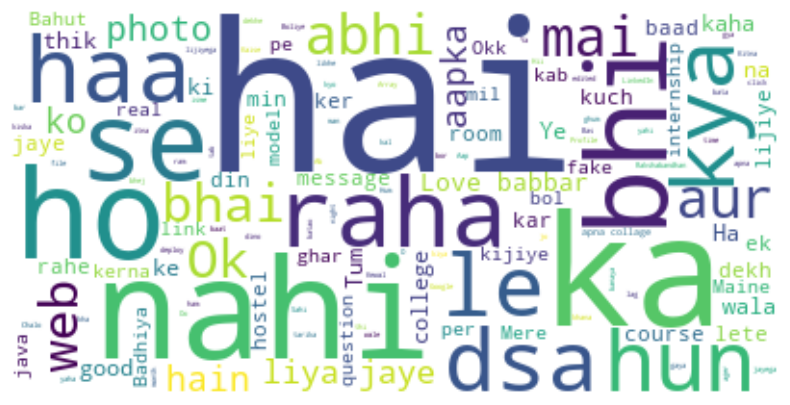

In [12]:
text = " ".join(review for review in df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
# Read the chat data from the file
with open(conversation, 'r', encoding='utf-8') as file:
    data = file.read()

In [17]:
# Define the regex pattern for chat messages
pattern = re.compile(r'^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}\s?(?:AM|PM|am|pm)?) - (.*?): (.*)$')

In [19]:
# Extract data
chat_data = []
for line in data.strip().split('\n'):
    match = pattern.match(line)
    if match:
        chat_data.append(match.groups())

In [21]:
# Define columns and create DataFrame
columns = ['date', 'time', 'sender', 'message']
chat_df = pd.DataFrame(chat_data, columns=columns)

In [23]:
# Combine date and time into a single datetime column
chat_df['datetime'] = pd.to_datetime(chat_df['date'] + ' ' + chat_df['time'])

C:\Users\unnat\AppData\Local\Temp\ipykernel_10580\390721501.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chat_df['datetime'] = pd.to_datetime(chat_df['date'] + ' ' + chat_df['time'])


In [25]:
# Function to determine sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [27]:
# Apply sentiment analysis
chat_df['sentiment_label'] = chat_df['message'].apply(get_sentiment)

In [29]:
# Calculate percentage of each sentiment category
sentiment_counts = chat_df['sentiment_label'].value_counts(normalize=True) * 100

In [31]:
# Print sentiment percentages
print("Sentiment Distribution:")
print(sentiment_counts)

Sentiment Distribution:
sentiment_label
neutral     86.458333
positive    10.416667
negative     3.125000
Name: proportion, dtype: float64


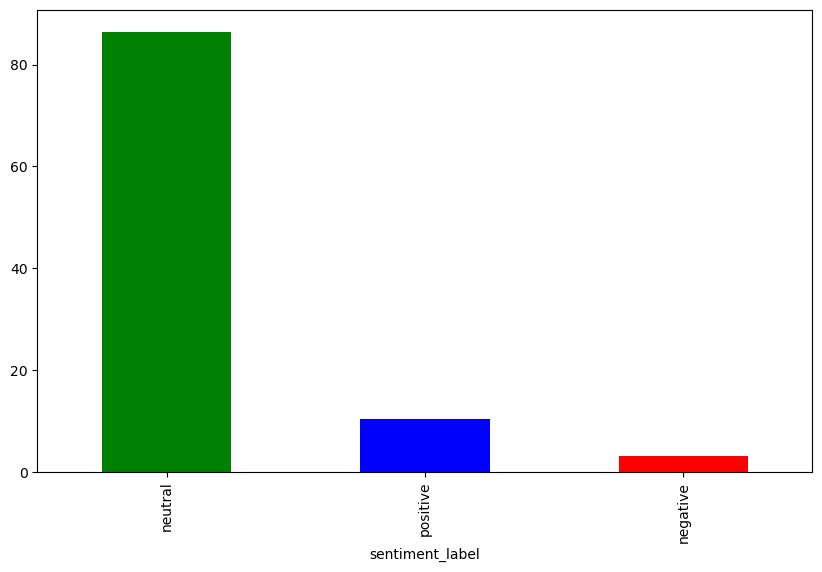

In [33]:
# Plot sentiment distribution with percentages below x-axis
plt.figure(figsize=(10, 6))
ax = sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
